In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.special as sc
import pandas as pd
import scipy.stats as st
import math
import matplotlib.ticker as mtick
import plotly.express as px
import csv

%pip install statsmodels
import statsmodels.api as sm

Note: you may need to restart the kernel to use updated packages.


In [31]:
#opendata, ministero delle infrastrutture e trasporti
scioperi=pd.read_csv('dataset/ScioperiItalia.csv',sep=',',decimal='.')
scioperi.head()

,dataInizio,dataFine,sindacato,settore,categoria,modalita,rilevanza,dataProclamazione,dataRicezione,nome_regione,nome_provincia,note
0,2014-01-08,2014-01-08,ANPCAT,Aereo,PERSONALE SOC. ENAV,4 ORE: DALLE 13.00 ALLE 17.00,Nazionale,2013-12-24,2013-12-24 17:07:00,Italia,Tutte,ESCLUSI VOLI DELLA SOC. EASYJET
1,2014-01-09,2014-01-09,OSR USB LAVORO PRIVATO,Aereo,PERSONALE SOCC. SEA E SEA HANDLING DI MILANO ...,4 ORE: DALLE 10.00 ALLE 14.00,Nazionale,2013-12-30,2013-12-30 09:58:00,Italia,Tutte,NaN
2,2014-01-09,2014-01-09,OSR FEDERMAR-CISAL,Marittimo,PERSONALE SOC. SIREMAR - COMPAGNIA DELLE ISOLE...,24 ORE CON VARIE MODALITA',Regionale,2013-12-29,2013-12-29 23:37:00,Sicilia,Tutte,NaN
3,2014-01-10,2014-01-10,OSR USB LAVORO PRIVATO,Ferroviario,PERS. MOBILE SOC. TRENITALIA DIV. PASSEGGERI N...,1 ORA: DALLE 09.00 ALLE 10.00 - OMC 10 MIN.:9....,Regionale,2013-12-31,2013-12-31 10:58:00,Emilia-Romagna,Tutte,NaN
4,2014-01-10,2014-01-10,OSR FILT-CGIL/FIT-CISL/UILT-UIL/UGL/FAST FERRO...,Appalti ferroviari,PERSONALE APPALTI FS SOC. IPRAMS DEGLI IMPIANT...,4 ORE: DALLE 9.36 ALLE 13.36,Regionale,2013-12-16,2013-12-17 12:11:00,Umbria,Tutte,NaN


In [32]:
def converti_ad_ore(modalita):
   if 'ORE'  in modalita:
      return modalita.split('ORE')[0] 
   elif 'ORA'  in modalita:
      return modalita.split('ORA')[0]
   elif 'MIN' in modalita:
      return 1
   elif 'INTERA GIORNATA' in modalita or 'INTERA PRESTAZIONE' in modalita:
      return 24
   elif 'INTERO TURNO' in modalita:
      return 8
   elif 'MET' in modalita or 'MEZZO TURNO' in modalita:
      return 4
   else:
      return 0

In [33]:
scioperi['durata_ore'] = scioperi['modalita'].apply(converti_ad_ore)
scioperi[['modalita','durata_ore']]

,modalita,durata_ore
0,4 ORE: DALLE 13.00 ALLE 17.00,4
1,4 ORE: DALLE 10.00 ALLE 14.00,4
2,24 ORE CON VARIE MODALITA',24
3,1 ORA: DALLE 09.00 ALLE 10.00 - OMC 10 MIN.:9....,1
4,4 ORE: DALLE 9.36 ALLE 13.36,4
...,...,...
4690,24 ORE,24
4691,24 ORE,24
4692,24 ORE,24
4693,4 ORE: DALLE 13.00 ALLE 17.00,4


In [34]:
scioperi['durata_ore'] = pd.to_numeric(scioperi['durata_ore'], errors='coerce')

scioperi_ore_clean = scioperi.dropna(subset=['durata_ore'])

scioperi_ore_clean[['modalita','durata_ore']]

,modalita,durata_ore
0,4 ORE: DALLE 13.00 ALLE 17.00,4.0
1,4 ORE: DALLE 10.00 ALLE 14.00,4.0
2,24 ORE CON VARIE MODALITA',24.0
3,1 ORA: DALLE 09.00 ALLE 10.00 - OMC 10 MIN.:9....,1.0
4,4 ORE: DALLE 9.36 ALLE 13.36,4.0
...,...,...
4690,24 ORE,24.0
4691,24 ORE,24.0
4692,24 ORE,24.0
4693,4 ORE: DALLE 13.00 ALLE 17.00,4.0


In [35]:
scioperi_ore_clean['durata_ore'].unique()

array([  4.,  24.,   1.,   2.,   8.,  14., 120.,  21.,  48.,  12.,  20.,
        72.,  15.,   0.,   6.,  96.,  23.,  18.,   3.,  22.,  36.,  16.,
         9.,   5.,  10.,   7., 144.,  11., 192.,  50., 146.])

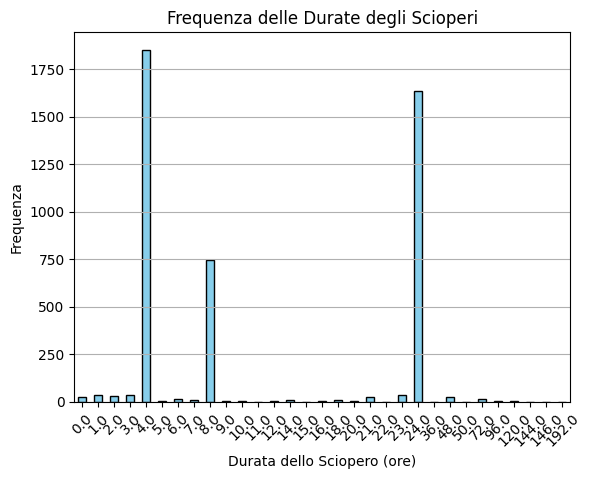

In [36]:
frequenza_ore_di_sciopero = scioperi_ore_clean['durata_ore'].value_counts()

frequenza_ore_di_sciopero_ordinata = frequenza_ore_di_sciopero.sort_index()

frequenza_ore_di_sciopero_ordinata.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequenza delle Durate degli Scioperi')
plt.xlabel('Durata dello Sciopero (ore)')
plt.ylabel('Frequenza')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

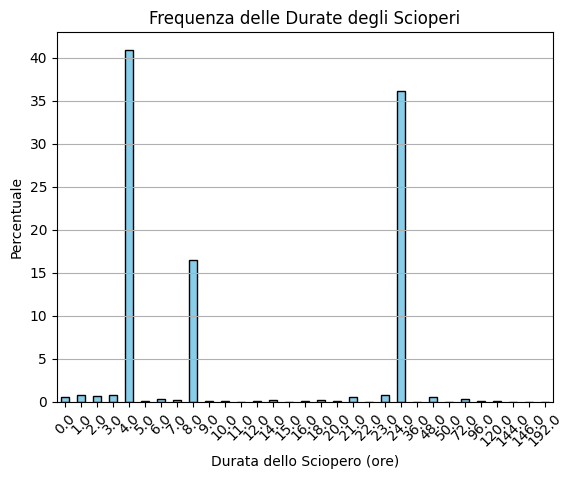

In [37]:

frequenza_ore_di_sciopero_norm = scioperi_ore_clean['durata_ore'].value_counts(normalize=True)

frequenza_ore_di_sciopero_ordinata_norm = frequenza_ore_di_sciopero_norm.sort_index()

frequenza_ore_di_sciopero_ordinata_norm.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequenza delle Durate degli Scioperi')
plt.xlabel('Durata dello Sciopero (ore)')
plt.ylabel('Frequenza')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0f}'.format(y * 100)))
plt.ylabel('Percentuale')
plt.show()

In [38]:
frequenza_ore_di_sciopero_ordinata_normAndSorted=frequenza_ore_di_sciopero_ordinata_norm.sort_values(ascending=False)
daStampare=frequenza_ore_di_sciopero_ordinata_normAndSorted[frequenza_ore_di_sciopero_ordinata_normAndSorted.values>0.02]
maggioriDiGiornata=frequenza_ore_di_sciopero_ordinata_normAndSorted[frequenza_ore_di_sciopero_ordinata_normAndSorted.index > 24.0].values.sum()
minoreDiGiornata=frequenza_ore_di_sciopero_ordinata_normAndSorted[frequenza_ore_di_sciopero_ordinata_normAndSorted.index < 24.0]
minoreDiGiornata=minoreDiGiornata[minoreDiGiornata.index > 8.0].values.sum()

print(daStampare)
print(minoreDiGiornata,maggioriDiGiornata)


durata_ore
4.0     0.409011
24.0    0.360866
8.0     0.164973
Name: proportion, dtype: float64
0.021422261484098946 0.009938162544169609


In [39]:
daStampare = pd.DataFrame({
    'index': ['4h','8h','24h','<24h','>24h'],
    'values': [0.409011,0.360866,0.164973,minoreDiGiornata, minoreDiGiornata]  
})

# Set the index of the new DataFrame
daStampare.set_index('index', inplace=True)
daStampare

,values
index,
4h,0.409011
8h,0.360866
24h,0.164973
<24h,0.021422
>24h,0.021422


In [40]:
daStampare['values']

index
4h      0.409011
8h      0.360866
24h     0.164973
<24h    0.021422
>24h    0.021422
Name: values, dtype: float64

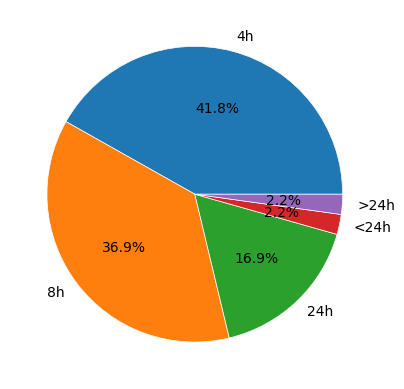

In [41]:

fig, ax = plt.subplots()
ax.pie(daStampare['values'].values*100,labels=daStampare['values'].index,autopct = '%1.1f%%', wedgeprops = {"linewidth": 0.5, "edgecolor": "white"})
plt.show()

In [42]:
scioperi_ferroviari=scioperi[(scioperi['settore'] == 'Ferroviario')]
scioperi_ferroviari['dataInizio'] = pd.to_datetime(scioperi_ferroviari['dataInizio'])


/var/folders/l_/g9z6nmyj7zq9g1y79tdg1q380000gn/T/ipykernel_15866/2625114254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scioperi_ferroviari['dataInizio'] = pd.to_datetime(scioperi_ferroviari['dataInizio'])


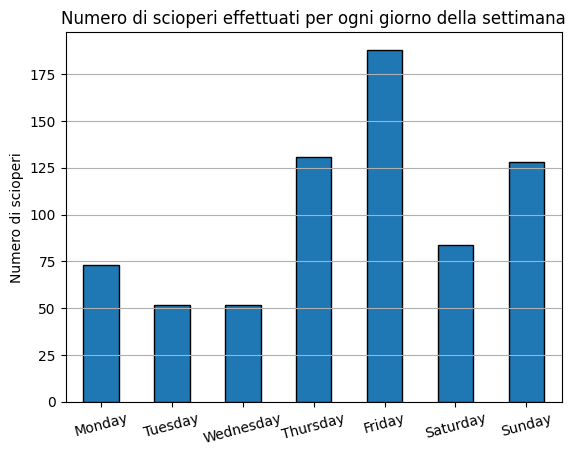

dataInizio
Monday        73
Tuesday       52
Wednesday     52
Thursday     131
Friday       188
Saturday      84
Sunday       128
Name: count, dtype: int64


In [43]:
frequenza_giorni_sciopero = scioperi_ferroviari['dataInizio'].dt.day_name().value_counts()
giorni_ordinati = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
frequenza_giorni_sciopero = frequenza_giorni_sciopero.reindex(giorni_ordinati)

frequenza_giorni_sciopero.plot(kind='bar',  edgecolor='black')
plt.title('Numero di scioperi effettuati per ogni giorno della settimana')
plt.ylabel('Numero di scioperi')
plt.xlabel('')
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()

print(frequenza_giorni_sciopero)

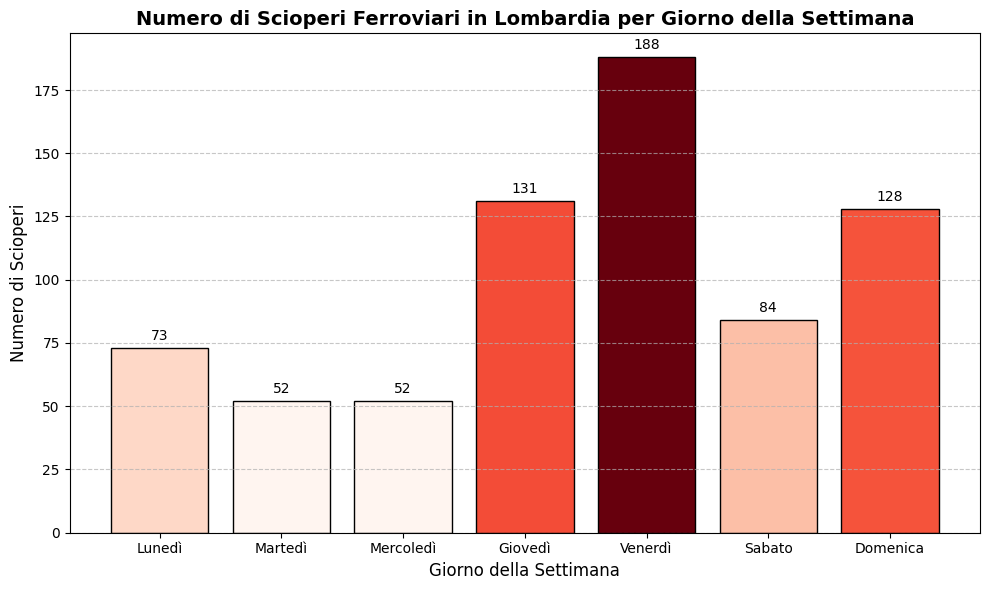

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
giorni = ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì", "Sabato", "Domenica"]
scioperi = [73, 52, 52, 131, 188, 84, 128]

# Configurazione dei colori ordinati per numero di scioperi
norm = plt.Normalize(min(scioperi), max(scioperi))
colors = plt.cm.Reds(norm(scioperi))

# Creazione del grafico
plt.figure(figsize=(10, 6))
bars = plt.bar(giorni, scioperi, color=colors, edgecolor="black")

# Aggiungere etichette ai valori
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height}', 
             ha='center', va='bottom', fontsize=10)

# Titoli e etichette
plt.title("Numero di Scioperi Ferroviari in Lombardia per Giorno della Settimana", fontsize=14, weight='bold')
plt.xlabel("Giorno della Settimana", fontsize=12)
plt.ylabel("Numero di Scioperi", fontsize=12)

# Miglioramento della griglia
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrare il grafico
plt.show()


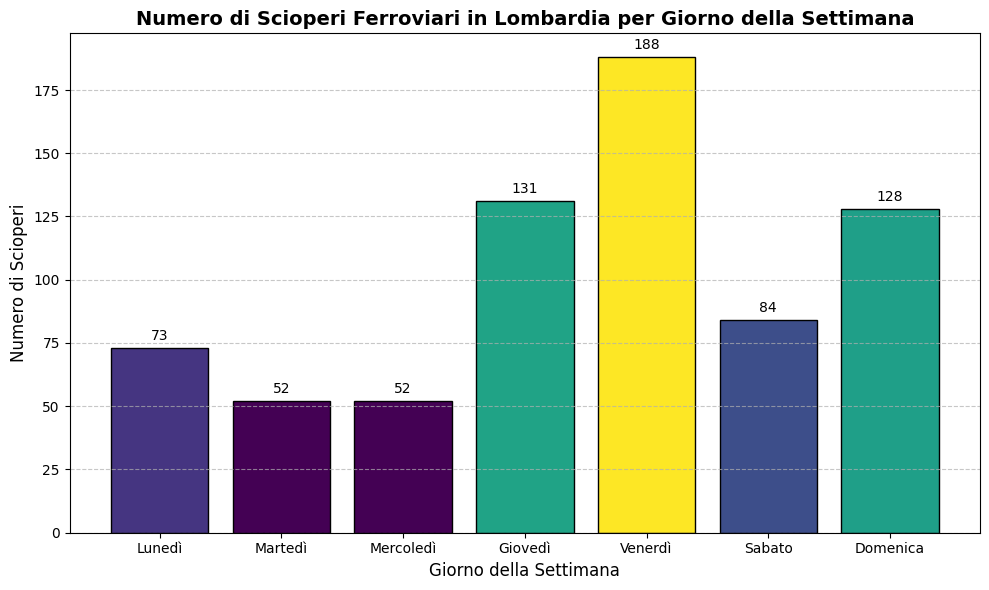

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
giorni = ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì", "Sabato", "Domenica"]
scioperi = [73, 52, 52, 131, 188, 84, 128]

# Configurazione dei colori inclusivi per daltonici (viridis)
norm = plt.Normalize(min(scioperi), max(scioperi))
colors = plt.cm.viridis(norm(scioperi))

# Creazione del grafico
plt.figure(figsize=(10, 6))
bars = plt.bar(giorni, scioperi, color=colors, edgecolor="black")

# Aggiungere etichette ai valori
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height}', 
             ha='center', va='bottom', fontsize=10)

# Titoli e etichette
plt.title("Numero di Scioperi Ferroviari in Lombardia per Giorno della Settimana", fontsize=14, weight='bold')
plt.xlabel("Giorno della Settimana", fontsize=12)
plt.ylabel("Numero di Scioperi", fontsize=12)

# Miglioramento della griglia
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrare il grafico
plt.show()


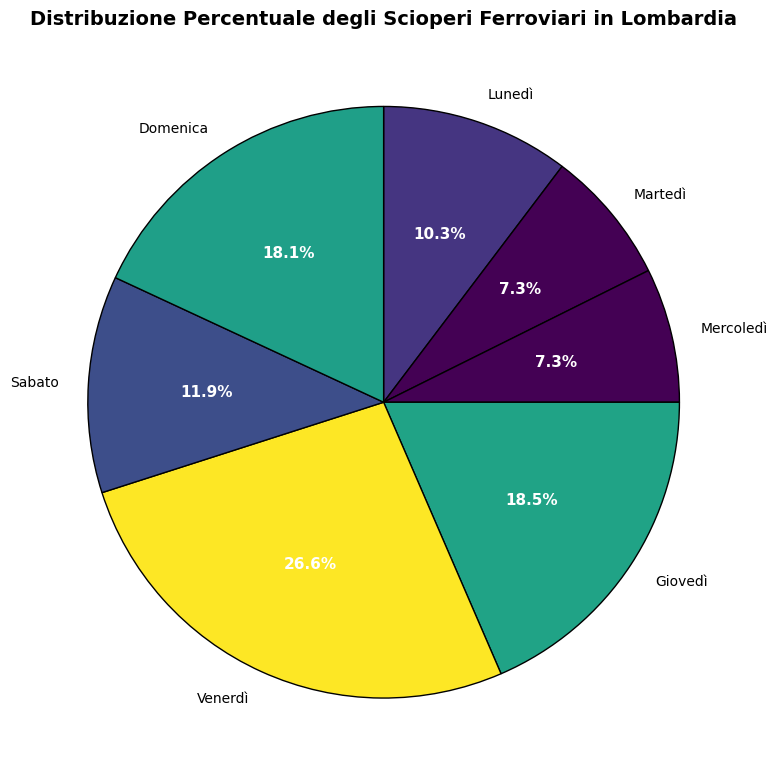

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
giorni = ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì", "Sabato", "Domenica"]
scioperi = [73, 52, 52, 131, 188, 84, 128]

# Configurazione dei colori inclusivi per daltonici (viridis)
norm = plt.Normalize(min(scioperi), max(scioperi))
colors = plt.cm.viridis(norm(scioperi))

# Creazione del grafico a torta
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(scioperi, labels=giorni, colors=colors, autopct='%1.1f%%', startangle=90, 
                                   counterclock=False, textprops={'fontsize': 10}, wedgeprops={'edgecolor': 'black'})

# Miglioramento della leggibilità delle percentuali
for autotext in autotexts:
    autotext.set_color('white')  # Percentuali in bianco per leggibilità
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Titolo
plt.title("Distribuzione Percentuale degli Scioperi Ferroviari in Lombardia", fontsize=14, weight='bold')

# Mostrare il grafico
plt.tight_layout()
plt.show()


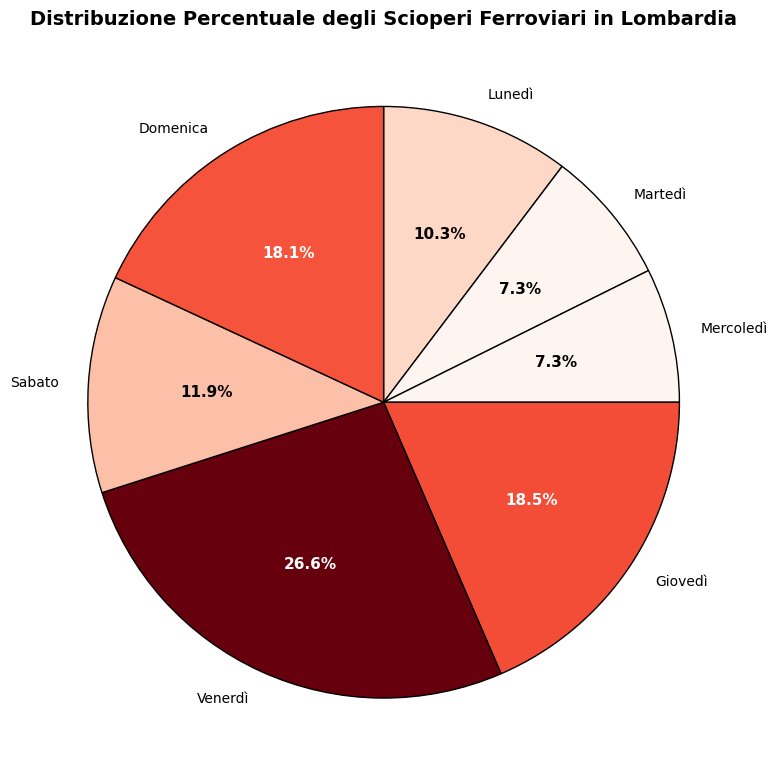

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
giorni = ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì", "Sabato", "Domenica"]
scioperi = [73, 52, 52, 131, 188, 84, 128]

# Configurazione dei colori in gradazioni di rosso
norm = plt.Normalize(min(scioperi), max(scioperi))
colors = plt.cm.Reds(norm(scioperi))

# Creazione del grafico a torta
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(scioperi, labels=giorni, colors=colors, autopct='%1.1f%%', startangle=90, 
                                   counterclock=False, textprops={'fontsize': 10}, wedgeprops={'edgecolor': 'black'})

# Miglioramento della leggibilità delle percentuali
for autotext, color in zip(autotexts, colors):
    # Cambiare il colore del testo in bianco o nero a seconda della luminosità dello sfondo
    luminance = 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2]  # Calcolo della luminanza
    autotext.set_color('white' if luminance < 0.5 else 'black')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Titolo
plt.title("Distribuzione Percentuale degli Scioperi Ferroviari in Lombardia", fontsize=14, weight='bold')

# Mostrare il grafico
plt.tight_layout()
plt.show()


comparare questi dati rispetto al numero di treni disponibili per ogni giorno

In [46]:
frequenza_giorni_sciopero.describe()

count      7.000000
mean     101.142857
std       50.121281
min       52.000000
25%       62.500000
50%       84.000000
75%      129.500000
max      188.000000
Name: count, dtype: float64

In [47]:
from scipy.stats import kstest

weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}


data = []
for day,count in frequenza_giorni_sciopero.items():
    day_number = weekday_mapping[day]
    data.extend([day_number] * count)
data = np.array(data)


from scipy.stats import randint
statistic, p_value = kstest(data, randint.cdf, args=(1, 8))

print(f"KS statistic: {statistic}")
print(f"p-value: {p_value}")

KS statistic: 0.3214285714285714
p-value: 1.396978701758968e-65


In [48]:
from scipy.stats import chisquare 
chisquare(frequenza_giorni_sciopero) 

Power_divergenceResult(statistic=np.float64(149.02542372881356), pvalue=np.float64(1.2434453448513146e-29))

I p-value estremamente bassi di entrambi di test, rifiutano l'ipotesi nulla(che i dati forniti provengano da una distribuzione uniforme discreta), di conseguenza si può suggerire che  il dataset non proviene da una distribuzione uniforme discreta.